In [1]:
import time

from diffbank.bank import Bank
import jax.numpy as jnp
from diffbank.waveforms.threePN_simple import amp, Psi
from diffbank.utils import get_M_eta_sampler, Sn_func
import matplotlib.pyplot as plt

In [2]:
fs = jnp.linspace(30.0, 512.0, 1000)
M_range = (4.0, 6.0)
eta_range = (0.13888, 0.25)
sampler = get_M_eta_sampler(M_range, eta_range)

bank = Bank.load_bank("../scripts/3PN.npz", amp, Psi, Sn_func, sampler)

In [54]:
import numpy as np
mismatch = 1-bank.m_star
mask = np.logical_and(
    bank.effectualnesses[:, 0] < 5.3, bank.effectualnesses[:, 0] > 4.6
) & np.logical_and(
    bank.effectualnesses[:, 1] < 0.21, bank.effectualnesses[:, 1] > 0.17
)
print(sum(mask))
masked_effectualness = bank.effectualnesses[mask]
print(
    "Fraction of templates above %.2f:" % mismatch,
    sum(bank.effectualnesses[:, -1] > mismatch) / bank.effectualnesses[:, -1].size,
)
print(
    "Subsampled fraction of templates above %.2f:" % mismatch,
    sum(masked_effectualness[:, -1] > mismatch) / masked_effectualness[:, -1].size,
)

118
Fraction of templates above 0.95: 0.841
Subsampled fraction of templates above 0.95: 0.8559322033898306


Fraction of templates above 0.95: 0.996


Text(0, 0.5, 'PDF')

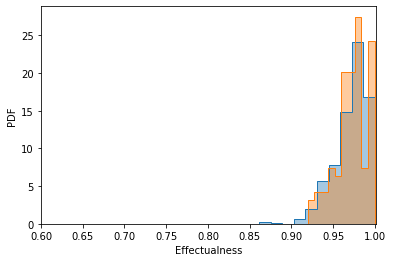

In [55]:
print("Fraction of templates above 0.95:", sum(bank.effectualnesses[:,-1] > 0.90)/bank.effectualnesses[:,-1].size)
plt.hist(bank.effectualnesses[:,-1], bins=10, histtype="step", color="C0", density=True)
plt.hist(bank.effectualnesses[:,-1], bins=10, alpha=0.4, color="C0", density=True)

plt.hist(masked_effectualness[:,-1], bins=10, histtype="step", color="C1", density=True)
plt.hist(masked_effectualness[:,-1], bins=10, alpha=0.4, color="C1", density=True)

plt.xlim(0.6, 1.001)
plt.xlabel("Effectualness")
plt.ylabel("PDF")

In [41]:
# import numpy as np
# M_range = (4.0, 6.0)
# eta_range = (0.13888, 0.25)
# n=10

# M_eta = np.random.uniform(
#             low=jnp.array([M_range[0], eta_range[0]]),
#             high=jnp.array([M_range[1], eta_range[1]]),
#             size=(n, 2),
#         )
# e = np.random.uniform(10,20,size=(n, 1))